In [18]:
import os
import numpy as np
import cv2
import csv
import torch
import networkx as nx
import numpy as np
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt

from attention_flow import VITAttentionFlow

In [ ]:
def attention_flow_mask(image):
    print(image)
    def show_mask_on_image(img, mask):
        img = np.float32(img) / 255
        heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
        heatmap = np.float32(heatmap) / 255
        cam = heatmap + np.float32(img)
        cam = cam / np.max(cam)
        return np.uint8(255 * cam)
    
    use_cuda = False
    head_fusion = "mean" # or "min" or "max"

    model = torch.hub.load('facebookresearch/deit:main',
        'deit_tiny_patch16_224', pretrained=True)
    model.eval()

    if use_cuda:
        model = model.cuda()

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])

    img = Image.open(image)
    img = img.resize((224, 224)).convert('RGB')
    input_tensor = transform(img).unsqueeze(0)
    if use_cuda:
        input_tensor = input_tensor.cuda()

    print("Doing Attention Flow")
    attention_flow = VITAttentionFlow(model, head_fusion=head_fusion)
    mask = attention_flow(input_tensor)
    return mask

def process_images_and_save_to_csv(image_folder, csv_filename):
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]
    
    with open(csv_filename, mode='w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        header = ['filename'] + [f'val_{i}' for i in range(14 * 14)]
        writer.writerow(header)
        
        for image_file in image_files:
            image_path = os.path.join(image_folder, image_file)
            heatmap = attention_flow_mask(image_path)
            heatmap_flat = heatmap.flatten()
            writer.writerow([image_file] + heatmap_flat.tolist())

def extract_heatmaps_from_csv(csv_filename):
    heatmaps = {}
    with open(csv_filename, mode='r') as csv_file:
        reader = csv.reader(csv_file)
        # Skip header
        header = next(reader)
        for row in reader:
            filename = row[0]
            values = np.array([float(x) for x in row[1:]])
            heatmap_matrix = values.reshape(14, 14)
            heatmaps[filename] = heatmap_matrix
    return heatmaps

In [14]:
image_folder = "test_images"
csv_filename = "heatmaps.csv"

# process images and save heatmaps to a CSV file
process_images_and_save_to_csv(image_folder, csv_filename)

# later extract the heatmaps from the CSV file
heatmaps = extract_heatmaps_from_csv(csv_filename)

# Print the heatmap of the first image for demonstration
for fname, hmap in heatmaps.items():
    print(f"Heatmap for {fname}:\n{hmap}\n")
    break

test_images\adolescent.png


Using cache found in C:\Users\aliel/.cache\torch\hub\facebookresearch_deit_main


Doing Attention Flow
Step 1
Step 2
Step 3
Step 4
Step 5
Heatmap shape: (14, 14)
Heatmap (normalized):
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.18545083 0.18670299 0.15346928 0.13302536 0.17210603
  0.235035   0.20359564 0.17444968 0.12610422 0.12875506 0.15572004
  0.14708365 0.        ]
 [0.         0.16367649 0.21062757 0.20854425 0.20211995 0.20877053
  0.17059588 0.18829633 0.2672869  0.27982298 0.26623448 0.21513169
  0.11367361 0.        ]
 [0.03396801 0.20459967 0.25785002 0.19615563 0.19817476 0.17834603
  0.16530348 0.18095809 0.19243455 0.18020741 0.14621221 0.13853232
  0.07809237 0.        ]
 [0.28177195 0.57909157 0.59430302 0.66440189 0.54214583 0.51641824
  0.4709304  0.42159756 0.37046821 0.27455707 0.20159378 0.13898235
  0.01028888 0.        ]
 [0.         0.85481106 0.4155961  0.03997081 0.67434372 0.75168449
  0.65182753 0.58425609 0.56649214 0.3481

Using cache found in C:\Users\aliel/.cache\torch\hub\facebookresearch_deit_main


Doing Attention Flow
Step 1
Step 2
Step 3
Step 4
Step 5
Heatmap shape: (14, 14)
Heatmap (normalized):
[[0.         0.39287106 0.12768253 0.23821098 0.12734363 0.01072049
  0.         0.         0.         0.22600709 0.22776694 0.57770266
  0.30123179 0.07419929]
 [0.         0.60222637 0.23542069 0.29129483 0.1959641  0.21523056
  0.36539739 0.59007065 0.11879074 0.0667642  0.68341978 0.19093677
  0.16908057 0.28136746]
 [0.12603701 0.40869009 0.27819723 0.36840992 0.29937092 1.
  0.77537149 0.50431642 0.38668492 0.66741538 0.28292394 0.25875092
  0.45191668 0.        ]
 [0.0749525  0.34784848 0.2093637  0.40034202 0.4117472  0.86298856
  0.89015619 0.38858098 0.54435493 0.66023155 0.11779856 0.28070936
  0.54343366 0.49208195]
 [0.         0.3141002  0.24431445 0.46594676 0.72332509 0.47606096
  0.93467058 0.76244672 0.68746828 0.59480019 0.38162011 0.73752793
  0.78452715 0.56103805]
 [0.         0.         0.00333818 0.17516542 0.50914894 0.52018041
  0.48520782 0.68034496 0.3057815

Using cache found in C:\Users\aliel/.cache\torch\hub\facebookresearch_deit_main


Doing Attention Flow
Step 1
Step 2
Step 3
Step 4
Step 5
Heatmap shape: (14, 14)
Heatmap (normalized):
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.01965007 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.15529144 0.62489648 0.05270456 0.0163371
  0.54344428 0.33970297 0.06231442 0.07401942 0.0532156  0.
  0.         0.        ]
 [0.65172243 0.85210279 0.76629115 0.76839911 0.96730305 0.56621527
  0.89035662 0.95383222 0.00337506 0.         0.         0.
  0.         0.        ]
 [0.31138425 0.76055946 0.69967851 0.56262167 0.64056066 0.93608426
  0.85255654 0.89747551 0.58139841 0.57487128 0.48424414 0.2231226
  0.13591393 0.        ]
 [0.25367692 0.40304543 0.48687668 0.50075618 0.8667515  0.97447139
  0.85310038 0.85871758 0.80392536 0.1645336  0.12239986 0.28943873
  0.226

Using cache found in C:\Users\aliel/.cache\torch\hub\facebookresearch_deit_main


Doing Attention Flow
Step 1
Step 2
Step 3
Step 4
Step 5
Heatmap shape: (14, 14)
Heatmap (normalized):
[[0.         0.         0.         0.00251128 0.         0.
  0.         0.         0.16450563 0.         0.         0.
  0.         0.        ]
 [0.         0.21652551 0.24586172 0.19335861 0.14681867 0.19852099
  0.29359192 0.70115138 0.90994057 0.14097748 0.12261421 0.15531946
  0.14289366 0.        ]
 [0.         0.29125831 0.40113921 0.61752275 0.34954351 0.2954777
  0.36022559 0.80099932 0.72360071 0.38654834 0.33470179 0.27484695
  0.15193187 0.        ]
 [0.10248575 0.26545454 0.21832522 0.69590786 0.83494971 0.70884039
  0.93851594 0.89374346 0.42189773 0.90813504 0.65687208 0.22179802
  0.15162328 0.        ]
 [0.         0.20682851 0.31852914 0.60155759 0.43939525 0.58048604
  0.91589934 0.90444823 0.9321489  0.94996763 0.37389457 0.29556537
  0.28509701 0.03143493]
 [0.         0.03555827 0.11800005 0.11486786 0.20182748 0.74151259
  0.97137273 0.59997614 0.69271033 0.65552

Using cache found in C:\Users\aliel/.cache\torch\hub\facebookresearch_deit_main


Doing Attention Flow
Step 1
Step 2
Step 3
Step 4
Step 5
Heatmap shape: (14, 14)
Heatmap (normalized):
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.14098937 0.16534154 0.121761   0.1111378  0.12719201
  0.18961645 0.16412268 0.13814241 0.08512196 0.08314797 0.12007459
  0.08365873 0.        ]
 [0.         0.10667896 0.18272554 0.20109468 0.19815564 0.2054566
  0.77737013 0.97056833 0.93923575 0.76174652 1.         0.72188661
  0.04871579 0.        ]
 [0.         0.05400626 0.17577481 0.20538105 0.59644695 0.99490156
  0.6804321  0.76474936 0.50496155 0.5394252  0.84806542 0.86206916
  0.08814201 0.        ]
 [0.         0.         0.9003642  0.51836757 0.65876327 0.86675476
  0.88359224 0.87426784 0.63685165 0.29323647 0.53145197 0.0719615
  0.00727662 0.        ]
 [0.         0.88169839 0.68305314 0.68496381 0.69218477 0.66628174
  0.50458632 0.74885536 0.27932673 0.302570

Using cache found in C:\Users\aliel/.cache\torch\hub\facebookresearch_deit_main


Doing Attention Flow
Step 1
Step 2
Step 3
Step 4
Step 5
Heatmap shape: (14, 14)
Heatmap (normalized):
[[0.         0.         0.         0.62828343 0.22056455 0.30439875
  0.37809564 0.46177613 0.         0.         0.30726318 0.31245604
  0.         0.        ]
 [0.         0.03861259 0.09596633 0.79079879 0.97698785 0.79186638
  0.84305521 0.84592458 0.85307414 0.76651771 0.39909728 0.69046283
  0.         0.        ]
 [0.54770342 0.61980027 0.16582118 0.63044875 0.87213669 0.75025456
  0.63651996 0.7667927  0.86192398 0.86678634 0.78899603 0.6475024
  0.         0.        ]
 [0.07014689 0.26369061 0.61265239 0.60497685 0.2675092  0.79138836
  1.         0.84663873 0.8862949  0.96658863 0.76810585 0.17931454
  0.         0.        ]
 [0.         0.26559311 0.63795356 0.6681809  0.58863944 0.76666621
  0.54618189 0.46980769 0.39977042 0.21880975 0.54196333 0.
  0.         0.        ]
 [0.60485785 0.76628086 0.48841664 0.64545144 0.81352304 0.80970732
  0.91280963 0.34692464 0.33453105

Using cache found in C:\Users\aliel/.cache\torch\hub\facebookresearch_deit_main


Step 1
Step 2
Step 3
Step 4
Step 5
Heatmap shape: (14, 14)
Heatmap (normalized):
[[0.         0.         0.         0.05923585 0.         0.
  0.         0.         0.         0.         0.01568583 0.
  0.         0.        ]
 [0.         0.26400648 0.25242815 0.23199991 0.22291988 0.25345065
  0.3259638  0.72152635 0.25069572 0.20159605 0.1969105  0.21766016
  0.20174724 0.        ]
 [0.         0.21498439 0.26672581 0.26871378 0.48791662 0.31176378
  0.99165101 0.94979474 0.94393317 0.95696772 0.94839242 0.76514205
  0.15324522 0.        ]
 [0.         0.14662454 0.21485543 0.93784332 0.79473758 1.
  0.82837457 0.54840679 0.80701706 0.5724747  0.80293358 0.96449561
  0.12992588 0.        ]
 [0.         0.13162386 0.20488909 0.2105758  0.90946898 0.42046499
  0.79827268 0.73826931 0.7989247  0.9713862  0.68891009 0.90977443
  0.09206547 0.        ]
 [0.         0.06491854 0.12331234 0.14384847 0.64307054 0.79080388
  0.55668727 0.44068277 0.91518444 0.64846007 0.3298262  0.76783261
  

Using cache found in C:\Users\aliel/.cache\torch\hub\facebookresearch_deit_main


Doing Attention Flow
Step 1
Step 2
Step 3
Step 4
Step 5
Heatmap shape: (14, 14)
Heatmap (normalized):
[[0.         0.         0.         0.         0.         0.04819254
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.42607847 0.24196136 0.12144561 0.88138341 0.83347333
  0.14849564 0.45009311 0.38893004 0.14535353 0.06362205 0.10343007
  0.         0.        ]
 [0.08738549 0.31567912 0.34265137 0.74815185 0.78911994 1.
  0.84563889 0.48407953 0.4673247  0.23059032 0.23786412 0.21301426
  0.05050049 0.        ]
 [0.16765414 0.39961041 0.34821811 0.72148207 0.70137655 0.8994656
  0.65802649 0.83742402 0.71801229 0.1629442  0.24089373 0.2595543
  0.0286487  0.        ]
 [0.         0.26479123 0.21821458 0.86202942 0.7791601  0.90373106
  0.67565502 0.87948863 0.76446518 0.70337528 0.44945361 0.
  0.342339   0.        ]
 [0.         0.11157688 0.64643375 0.78810465 0.69804332 0.75209189
  0.80753638 0.88788933 0.73591313 0.83725797 0.836

Using cache found in C:\Users\aliel/.cache\torch\hub\facebookresearch_deit_main


Doing Attention Flow
Step 1
Step 2
Step 3
Step 4
Step 5
Heatmap shape: (14, 14)
Heatmap (normalized):
[[0.         0.         0.02696009 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.15070655 0.27422766 0.17236213 0.12228816 0.24731386
  0.21173077 0.14449829 0.22793493 0.16349018 0.14983594 0.15828827
  0.34822438 0.        ]
 [0.         0.19608101 0.51879383 0.36527062 0.30083639 0.30756202
  0.25761702 0.31670371 0.34216819 0.37086732 0.53798698 0.82384728
  0.66013006 0.50878971]
 [0.         0.20280451 0.38981401 0.42749996 0.32169409 0.3803627
  0.72251624 0.89166737 0.8782927  0.69231086 0.49688335 0.6072499
  0.44070359 0.5384618 ]
 [0.         0.22134953 0.31583274 0.36355543 0.59408937 1.
  0.61709717 0.55455249 0.44723618 0.57719938 0.08203018 0.03291485
  0.00280786 0.        ]
 [0.         0.15022914 0.35773251 0.24183927 0.92385895 0.2234626
  0.23064121 0.29367454 0.96268777 0.2666505  0.0788

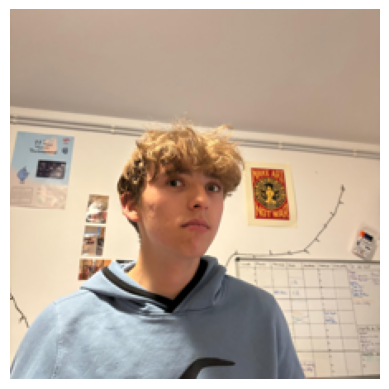

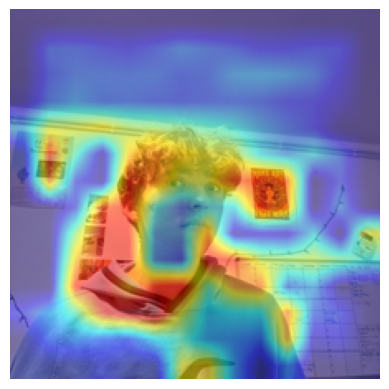

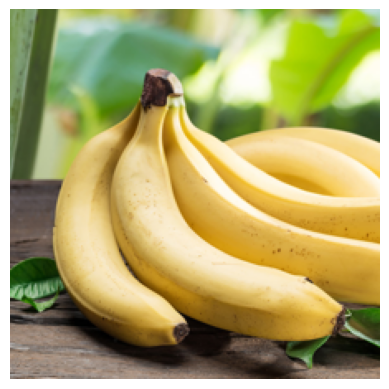

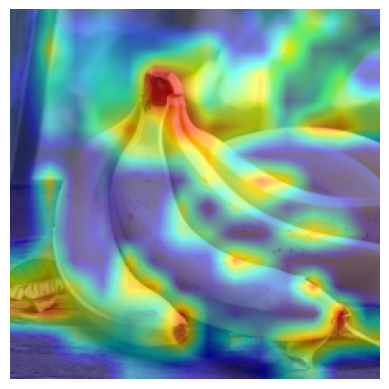

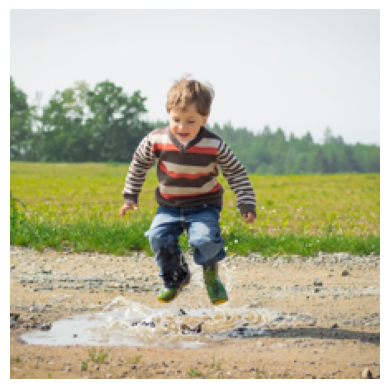

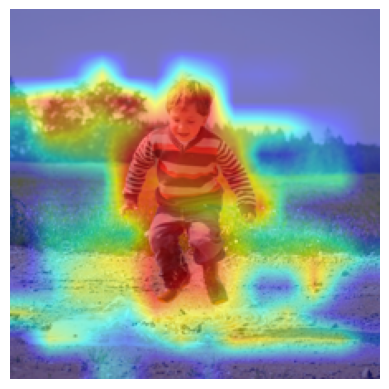

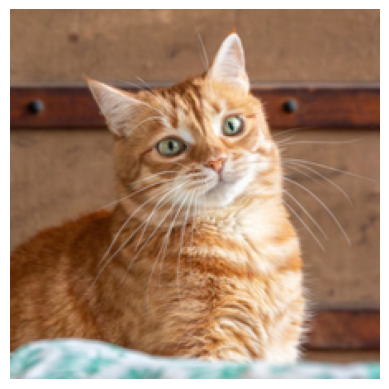

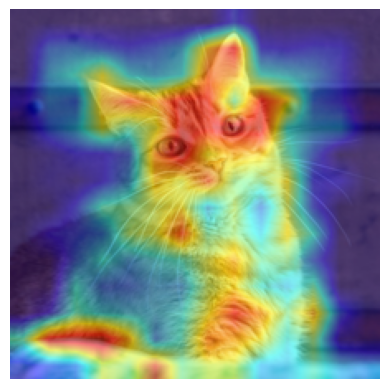

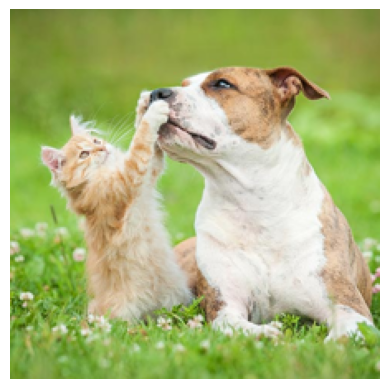

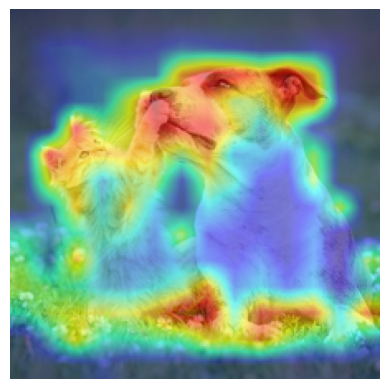

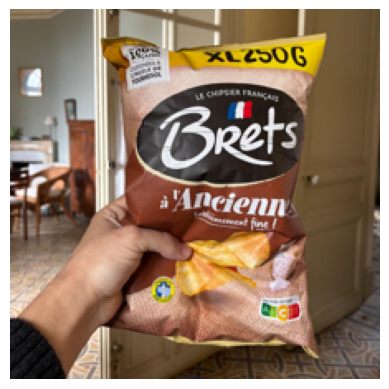

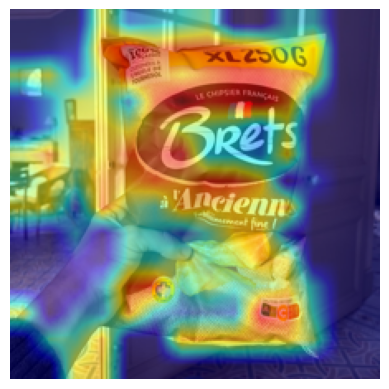

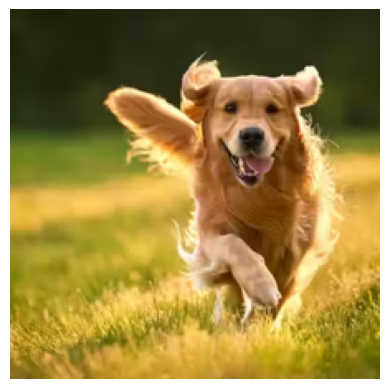

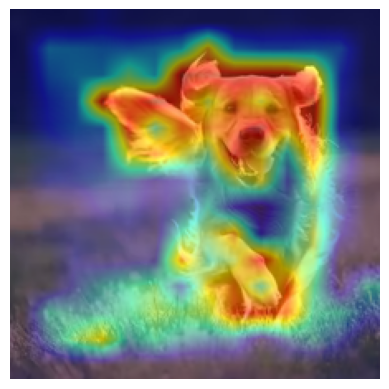

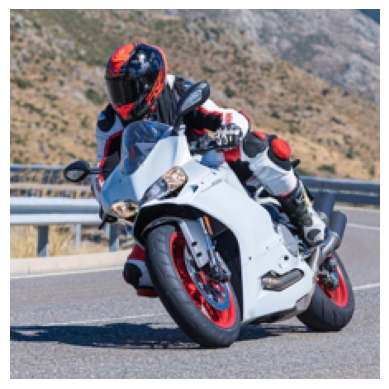

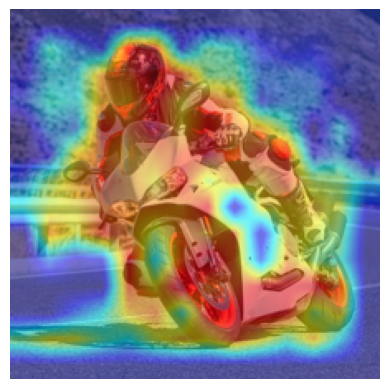

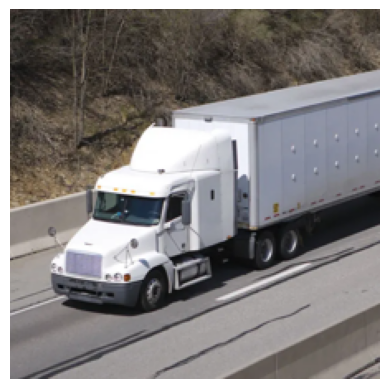

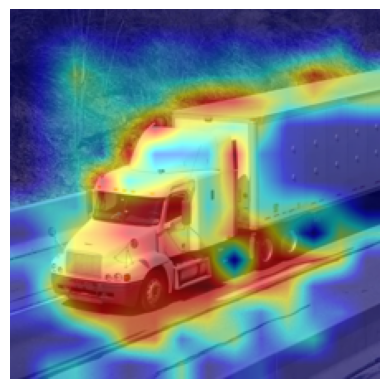

In [20]:
def show_mask_on_image(img, mask):
    img = np.float32(img) / 255
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)
    return np.uint8(255 * cam)

def show_image(image):
    """display an image using OpenCV and Matplotlib."""
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (Matplotlib uses RGB)
    plt.imshow(image)
    plt.axis('off') 
    plt.show()

for image in heatmaps :
    name = "test_images_results/{}_attention_flow_mean.png".format(image)

    mask = heatmaps[image]

    img = Image.open("test_images/" + image)
    img = img.resize((224, 224)).convert('RGB')

    np_img = np.array(img)[:, :, ::-1]
    mask = cv2.resize(mask, (np_img.shape[1], np_img.shape[0]))
    mask = show_mask_on_image(np_img, mask)

    show_image(np_img)
    show_image(mask)
    # cv2.imwrite("input.png", np_img)
    cv2.imwrite(name, mask)